# Практическое задание
Реализовать классификацию цветков ириса c  использованием функции ошибки *Hinge loss*:

$[M_i<0] \leqslant g(M_i)= max(0,1 - M_i)$

In [1]:
from classification_helper import *
import numpy as np

In [2]:
X, kind_iris = get_data()

Закодируйте вид цветка ириса метками класса $-1$ и $1$, результат запишите в переменную $y$

In [3]:
y = kind_iris.copy()
y[y == 'iris setosa'] = -1
y[y == 'iris virginica'] = 1
y = y.astype(int)

In [4]:
assert type(y[0]) != np.str_, "Вектор y должен содержать тип int"
assert sum(y) == 0, "Неверно закодирован вид ирисов"
assert sum (y**2) == 100, "Вектор  y должен содержать значения либо -1 либо 1"

Добавим первым столбцом в матрицу признаков столбец единиц

In [5]:
def add_ones(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = add_ones(X)

Зададим начальные веса $\Theta$ случайными значениями от 0 до 1:

In [6]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.80985798 0.11780204 0.96589037]


Выпишим функцию ошибки $\tilde L$
\begin{equation*}
\tilde L = \dfrac{1}{N}\sum_{i=1}^N g(M_i) \\
g(M_i) = max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - M_i) \\
\tilde L = \dfrac{1}{N}\sum_{i=1}^N max(0,1 - y_iX_i\Theta) \\
\end{equation*}`

Вычислим частную производную от $\tilde L$ по всесу $\theta_j$:

\begin{equation*}
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} =  \dfrac{1}{N}\sum_{i=1}^N\dfrac{\partial max(0,1 - y_iX_i\Theta)}{\partial \theta_j} \\
\dfrac{\partial max(0,1 - y_iX_i\Theta)}{\partial \theta_j} = 
\begin{cases}
-y_ix_{i,j}, &\text{$y_iX_i\Theta$ < 1} \\
0,  &\text{$y_iX_i\Theta \geqslant 1$}
\end{cases}
\end{equation*}

Реализуйте вычисление градиента


In [7]:
def gradient_function(Theta, X_train, y):
    grad = np.zeros_like(Theta)
    condition = np.zeros_like(y)
    condition[y * (X_train.dot(Theta)) < 1] = 1
    for j in range(0, grad.shape[0]):
        grad[j] = np.mean((-y)* X_train[:, j] * condition)
    return grad

In [8]:
theta_test = np.array([0.3,0.4,0.5])

if y[0] == -1:
    ans = np.array([0.5  , 2.503, 1.714])
else:
    ans = np.array([0.5  , 3.294, 1.487])
    
assert np.allclose(gradient_function(theta_test, X_train, y), ans), 'Неправильный ответ'

Реализуйте алгоритм градинтного спуска: $\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  

In [9]:
def gradient_descent(Theta, X_train, y, alpha, iters):        
    theta = Theta.copy()
    for i in range(0, iters):
        grad = gradient_function(theta, X_train, y)
        theta = theta - alpha * grad
    return theta

In [10]:
alpha = 0.01
iters = 500
theta_opt = gradient_descent(Theta, X_train, y, alpha, iters)

Реализуйте функцию предсказания класса для всех цветков на основе параметров $\Theta$

In [11]:
def predict_function(X_train, theta):
    y_pred = np.sign(np.dot(X_train, theta))
    return y_pred

y_pred = predict_function(X_train, theta_opt)

Посчитаем долю неверных ответов

In [12]:
def error(y, y_pred):
    return np.mean(y_pred != y)
err = error(y, y_pred)
print("Доля неверных ответов равна: ", err)


Доля неверных ответов равна:  0.01


Нарисуем разделяющую прямую

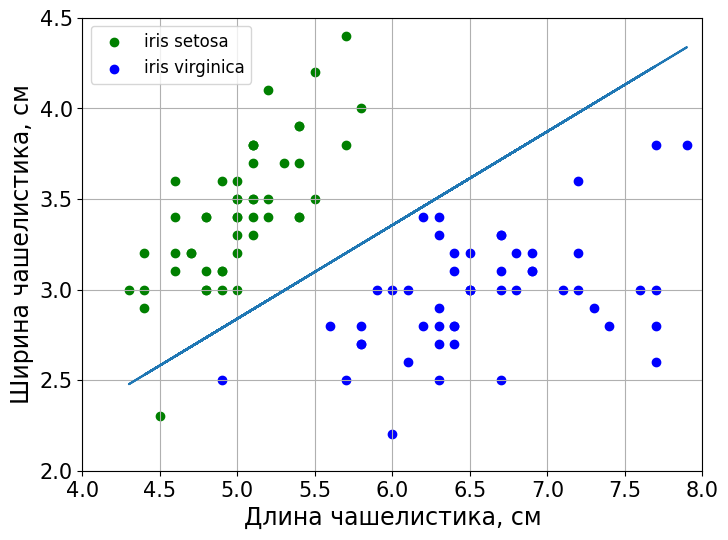

In [13]:
plot_finaly_trained_model(X, kind_iris, theta_opt)